In [14]:
import numpy as np
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [15]:
n=0 #counter
with open("C:\\Users\\shail\\AppData\\Local\\Programs\\Python\\Python36\\MyPrograms\\p1_data.txt", "r") as data:
    structured_data = []
    for line in data:
        #strips line of \n & splits by space
        s = line.split(" ")
        k = []
        #loop constructs strings of 3 floats per line
        for i in range(3):
            k.append(float(s[i]))
        structured_data.append(k)
        n = n+1 #counting our lines = dimension

m = []
y = []
 
for i in range(n):
    m.append([1,structured_data[i][0], structured_data[i][1]])
    y.append([structured_data[i][2]])

M = np.asmatrix(m) #converts m into a matrix M
Y = np.asmatrix(y) #converts y into a vector Y
 
prod_inv = M.transpose() * (M)
inverse = inv(prod_inv)
 
prod = (M.transpose() * (Y))
 
beta = inverse * prod
answer=[]
answer = M * beta
#---------------ends here----------------


In [16]:
data = pd.read_table("C:\\Users\\shail\\AppData\\Local\\Programs\\Python\\Python36\\MyPrograms\\p1_data.txt",delimiter=' ',header=None)
data.head()

,0,1,2
0,-7.644500,108.645100,1
1,47.463637,-79.438786,1
2,6.487614,-6.583677,0
3,-27.333037,-57.638238,0
4,46.456666,33.872351,0


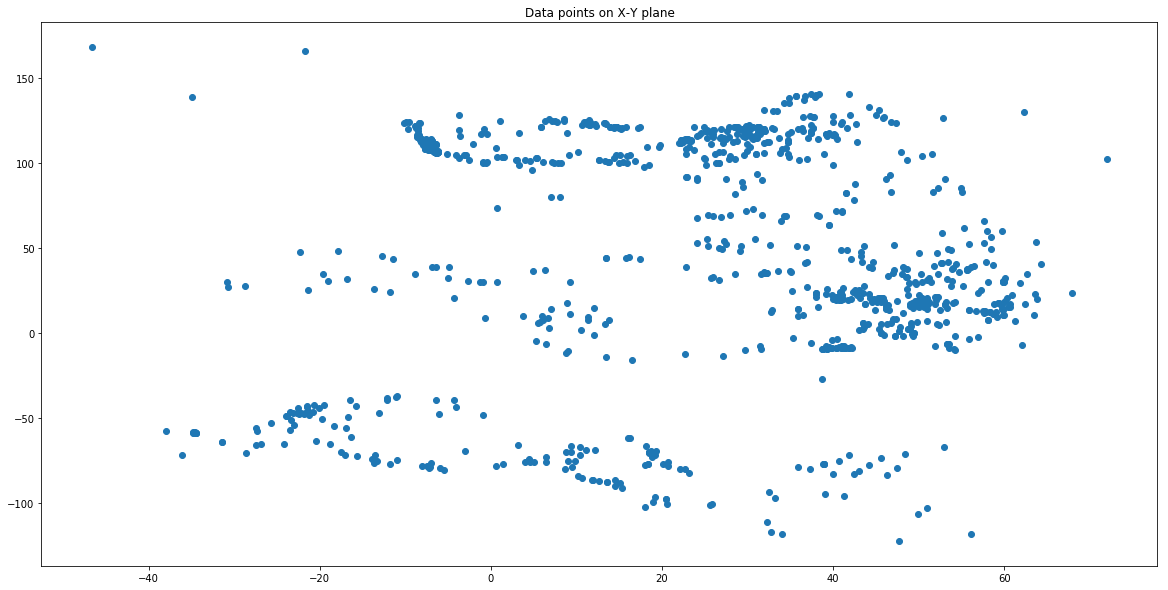

In [26]:
#------------Mesh over domain------------
 
step = 2.0

n_neighbors = 10
df_x = data.filter(items=[0,1])
df_y = data.filter(items=[2])
l_x = pd.DataFrame(df_x[0])
l_y = pd.DataFrame(df_x[1])
a_y = df_y.values
a_y = a_y.ravel()
a_y = np.asarray(a_y)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform',metric='euclidean') #p=2,metric = minkowski gives euclidian metric
clf.fit(df_x,a_y)
xmin = data[0].min()
xmax = data[0].max()
ymin = data[1].min()
ymax = data[1].max()
xx, yy = np.meshgrid(np.arange(xmin, xmax, step),
                     np.arange(ymin, ymax, step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,10))
plt.scatter(l_x,l_y)
plt.title('Data points on X-Y plane')
plt.show()

Solution 1
2-Class classification step size: 2.0 (k = 10)


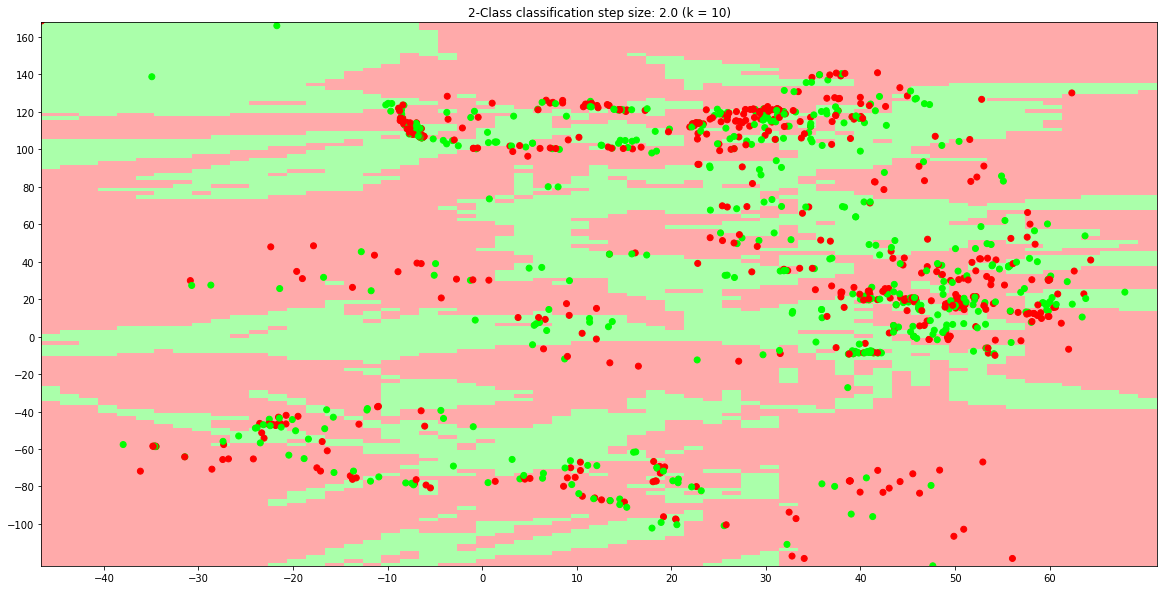

% of people that are unhappy with classification: 39.7







In [18]:
#----------plotting KNN Classification ---------
print('Solution 1')
print('2-Class classification step size: 2.0 (k = 10)')


plt.figure(figsize=(20,10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(l_x,l_y,c=df_y,cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks([-40,-30,-20,-10,0,10,20,30,40,50,60])
plt.yticks([-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160])
plt.title("2-Class classification step size: 2.0 (k = 10)")

plt.show()

print('% of people that are unhappy with classification:',(1-clf.score(df_x,df_y))*100)
print('\n\n\n\n')

plotting linear regression classification


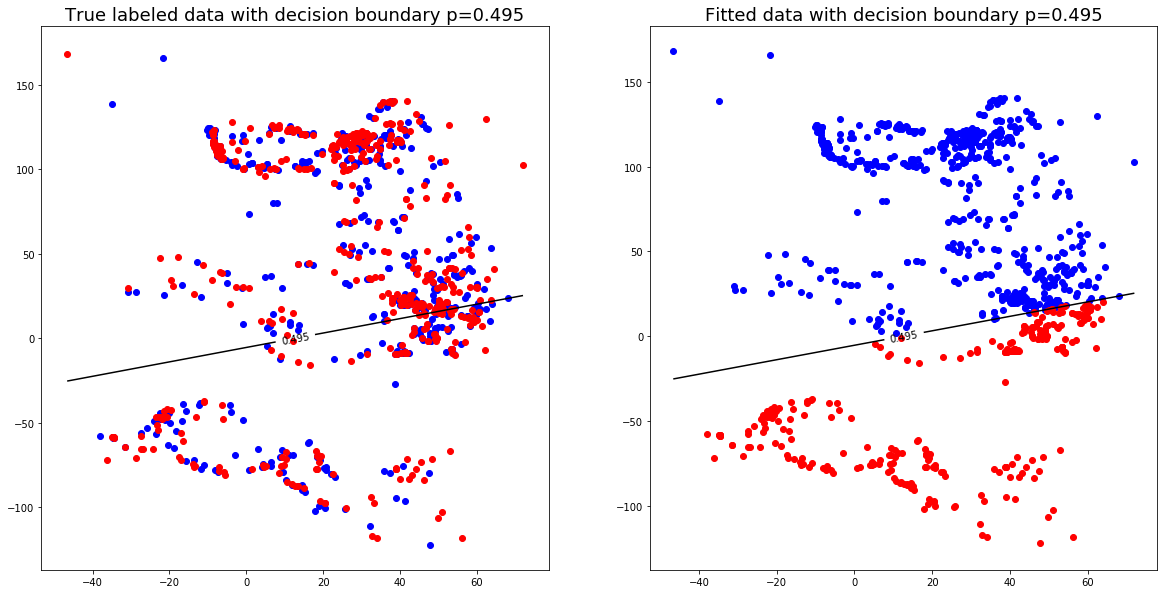

% of people that are unhappy with classification: 50.3





In [19]:
#----------plotting linear regression classification ---
print('plotting linear regression classification')
regr = linear_model.LinearRegression()
regr.fit(df_x,a_y)
data['Output'] = answer

mn = np.min(df_x, axis=0)
mx = np.max(df_x, axis=0)
X, Y = np.meshgrid(np.linspace(mn[0],mx[0],20), np.linspace(mn[1],mx[1],20))
grid = np.column_stack([X.ravel(),Y.ravel()])
Z = regr.predict(grid).reshape(X.shape)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

change_party = ax1.scatter(data[data.values==1][0],data[data.values==1][1],c='blue')
trad_party = ax1.scatter(data[data.values==0][0],data[data.values==0][1],c='red')

cs = ax1.contour(X,Y,Z, levels=[.495],colors='black')
ax1.clabel(cs, inline=1, fontsize=10)
ax1.set_title('True labeled data with decision boundary p=0.495',fontsize=18)


ax2.scatter(data[data['Output']>0.495][0],data[data['Output']>0.495][1],c='blue')
ax2.scatter(data[data['Output']<0.495][0],data[data['Output']<0.495][1],c='red')

cs = ax2.contour(X,Y, Z, levels=[.495],colors='black')
ax2.clabel(cs, inline=1, fontsize=10)
ax2.set_title('Fitted data with decision boundary p=0.495',fontsize=18)
plt.show()

data.loc[data['Output']>0.495,'Output']=1
data.loc[data['Output']<0.495,'Output']=0
print('% of people that are unhappy with classification:',(1-accuracy_score(data[2].values,data['Output'].values))*100)
print('\n\n')

Solution 2 
Checking for different step size and k values...


2-Class classification step size: 2.0 (k = 5)


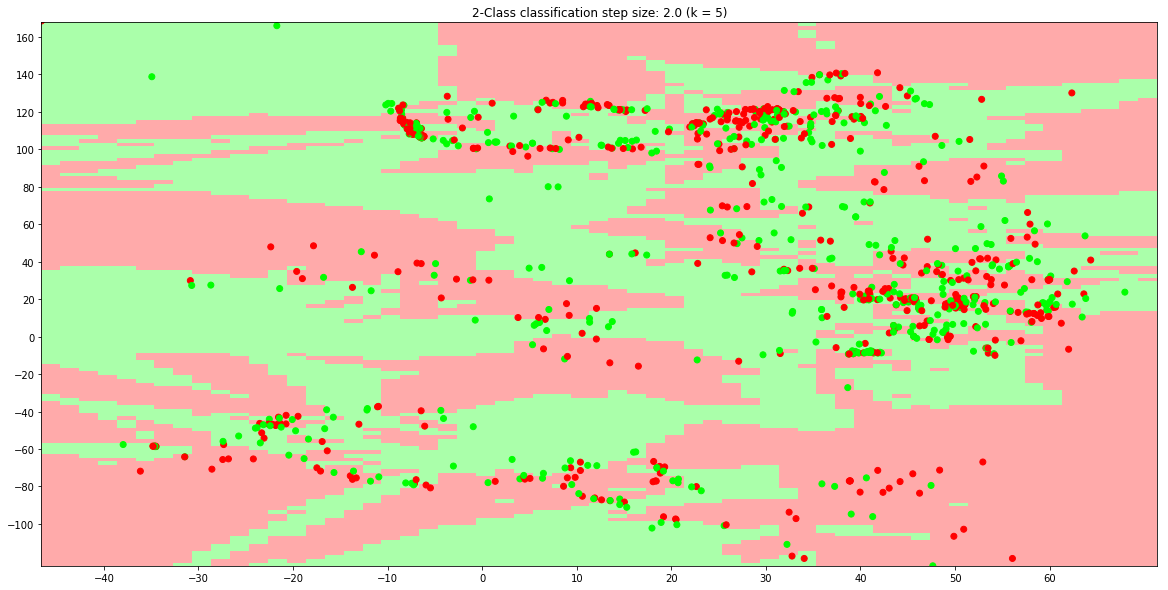

% of people that are unhappy with classification: 32.4



2-Class classification step size: 1.0 (k = 10)


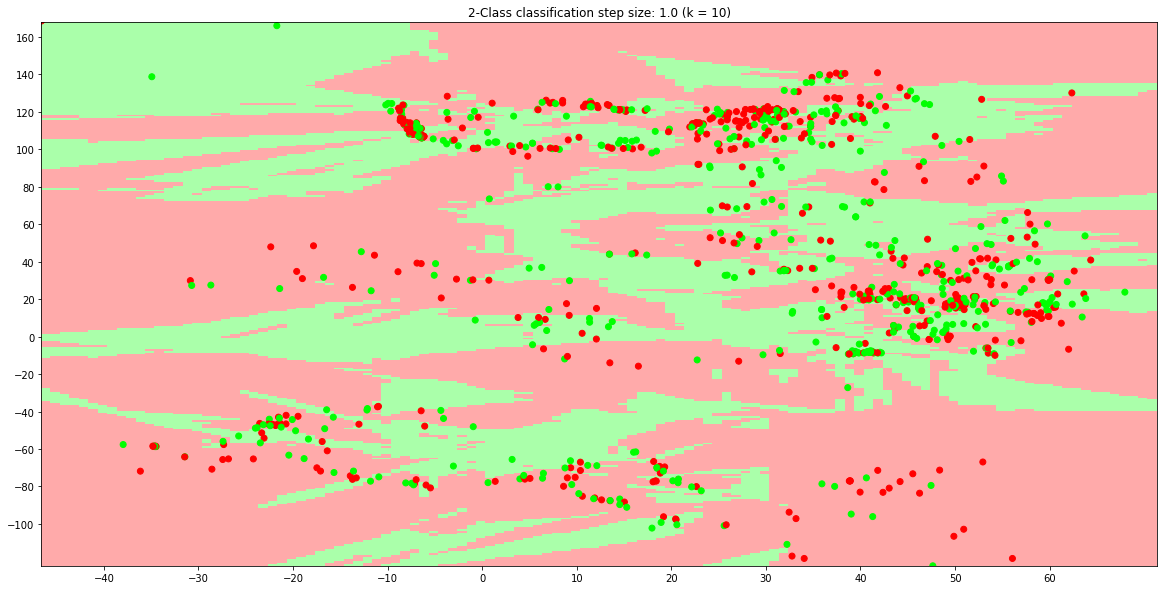

% of people that are unhappy with classification: 39.7



2-Class classification step size: 1.0 (k = 3)


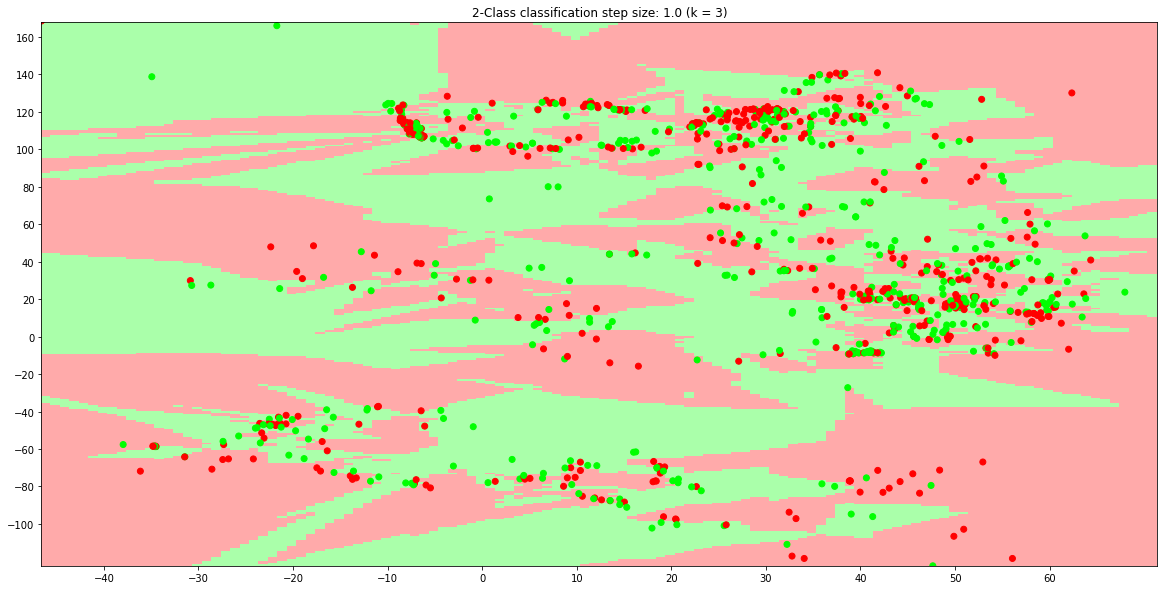

% of people that are unhappy with classification: 24.4



Visual Inspection shows us reducing k values gives a more accurate model, but in case falls in prey to overfitting due to data distribution.
Whereas, reducing step-size introdcues more precision in the mesh giving better prediction in the model.


In [31]:
#----------step size = 2.0 and k =5 ------------
print('Solution 2 \nChecking for different step size and k values...\n\n')
print('2-Class classification step size: 2.0 (k = 5)')
clf = neighbors.KNeighborsClassifier(5, weights='uniform',p=2,metric='minkowski')
clf.fit(df_x,a_y)
xx, yy = np.meshgrid(np.arange(xmin, xmax, 2.0),
                     np.arange(ymin, ymax, 2.0))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(20,10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(l_x,l_y,c=df_y,cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks([-40,-30,-20,-10,0,10,20,30,40,50,60])
plt.yticks([-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160])
plt.title("2-Class classification step size: 2.0 (k = 5)")
plt.show()
print('% of people that are unhappy with classification:',(1-clf.score(df_x,df_y))*100)
print('\n\n')

#----------step size = 1.0 and k=10 ------------
print('2-Class classification step size: 1.0 (k = 10)')
clf = neighbors.KNeighborsClassifier(10, weights='uniform',p=2,metric='minkowski')
clf.fit(df_x,a_y)
xx, yy = np.meshgrid(np.arange(xmin, xmax, 1.0),
                     np.arange(ymin, ymax, 1.0))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(20,10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(l_x,l_y,c=df_y,cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks([-40,-30,-20,-10,0,10,20,30,40,50,60])
plt.yticks([-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160])
plt.title("2-Class classification step size: 1.0 (k = 10)")
plt.show()
print('% of people that are unhappy with classification:',(1-clf.score(df_x,df_y))*100)
print('\n\n')
#----------step size =1.0 and k=3 --------------
print('2-Class classification step size: 1.0 (k = 3)')
clf = neighbors.KNeighborsClassifier(3, weights='uniform',p=2,metric='minkowski')
clf.fit(df_x,a_y)
xx, yy = np.meshgrid(np.arange(xmin, xmax, 1.0),
                     np.arange(ymin, ymax, 1.0))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(20,10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(l_x,l_y,c=df_y,cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks([-40,-30,-20,-10,0,10,20,30,40,50,60])
plt.yticks([-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160])
plt.title("2-Class classification step size: 1.0 (k = 3)")
plt.show()
print('% of people that are unhappy with classification:',(1-clf.score(df_x,df_y))*100)
print('\n\n')
print('Visual Inspection shows us reducing k values gives a more accurate model, but in case falls in prey to overfitting due to data distribution.\nWhereas, reducing step-size introdcues more precision in the mesh giving better prediction in the model.')


Solution 3
Using manhattan distance as metric
2-Class classification step size: 2.0 (k = 10)


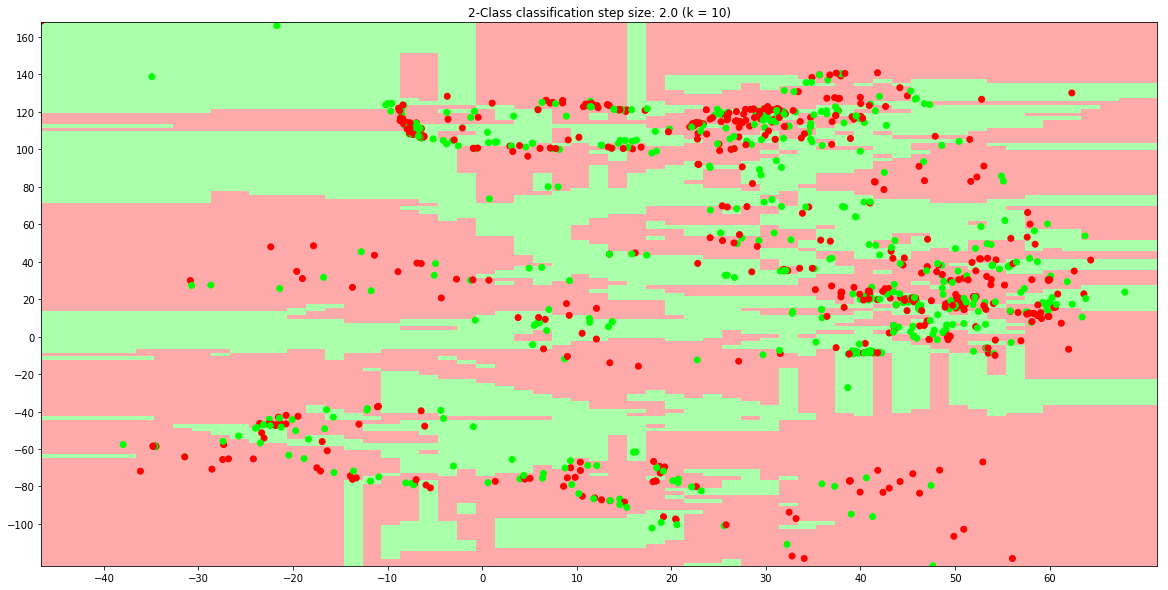

% of people that are unhappy with classification: 40.800000000000004
Using minkowski with p=4 distance as metric
2-Class classification step size: 2.0 (k = 10)


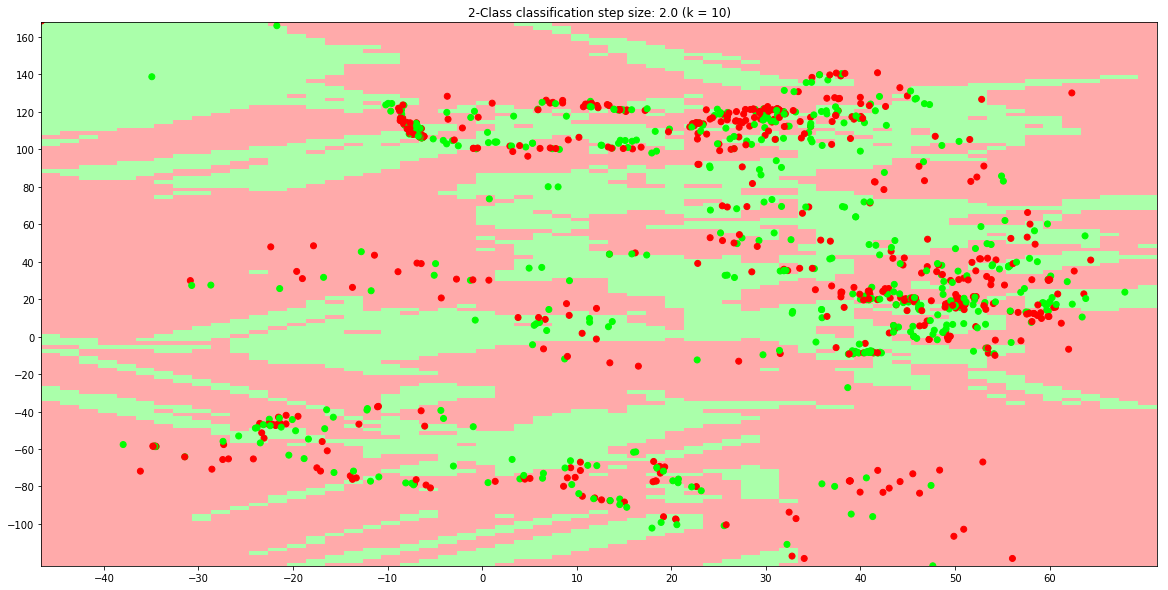

% of people that are unhappy with classification: 39.800000000000004
Using chebyshev as metric
2-Class classification step size: 2.0 (k = 10)


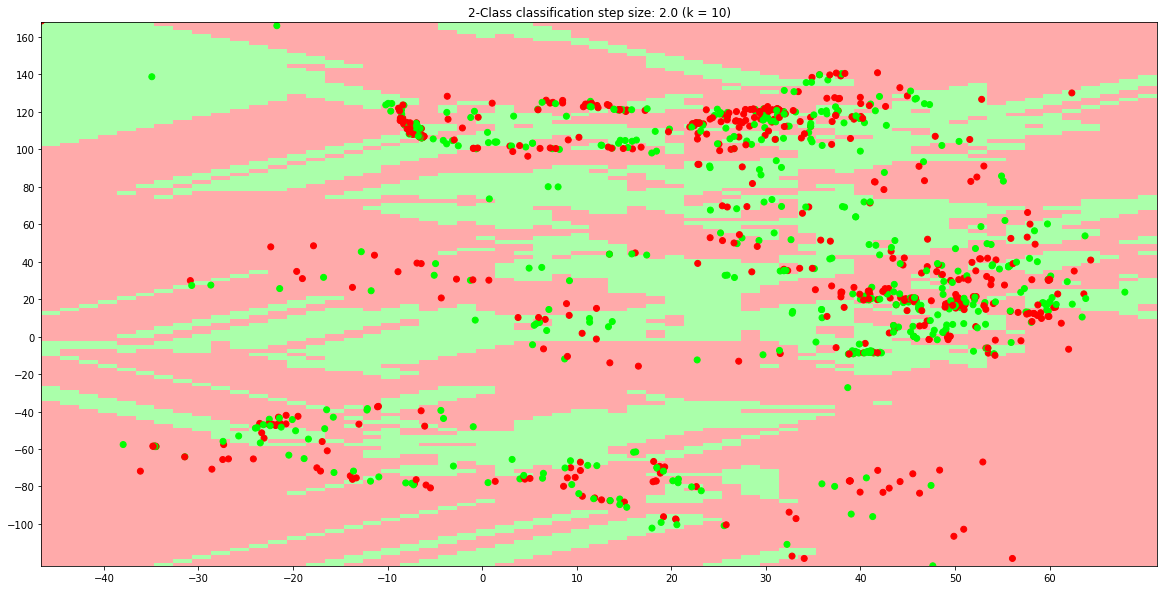

% of people that are unhappy with classification: 39.2


In [27]:
#-------------- trying same problem with manhattan, minkowski p=4 and chebyshev metric ----------
print('Solution 3')
print('Using manhattan distance as metric')
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform',metric='manhattan') 
clf.fit(df_x,a_y)
print('2-Class classification step size: 2.0 (k = 10)')
l_x = pd.DataFrame(df_x[0])
l_y = pd.DataFrame(df_x[1])

xx, yy = np.meshgrid(np.arange(xmin, xmax, 2.0),
                     np.arange(ymin, ymax, 2.0))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(l_x,l_y,c=df_y,cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks([-40,-30,-20,-10,0,10,20,30,40,50,60])
plt.yticks([-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160])
plt.title("2-Class classification step size: 2.0 (k = 10)")

plt.show()

print('% of people that are unhappy with classification:',(1-clf.score(df_x,df_y))*100)

print('Using minkowski with p=4 distance as metric')
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform',p=4,metric='minkowski') 
clf.fit(df_x,a_y)
print('2-Class classification step size: 2.0 (k = 10)')
l_x = pd.DataFrame(df_x[0])
l_y = pd.DataFrame(df_x[1])

xx, yy = np.meshgrid(np.arange(xmin, xmax, 2.0),
                     np.arange(ymin, ymax, 2.0))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(l_x,l_y,c=df_y,cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks([-40,-30,-20,-10,0,10,20,30,40,50,60])
plt.yticks([-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160])
plt.title("2-Class classification step size: 2.0 (k = 10)")

plt.show()

print('% of people that are unhappy with classification:',(1-clf.score(df_x,df_y))*100)

print('Using chebyshev as metric')

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform',metric='chebyshev') 
clf.fit(df_x,a_y)
print('2-Class classification step size: 2.0 (k = 10)')
l_x = pd.DataFrame(df_x[0])
l_y = pd.DataFrame(df_x[1])

xx, yy = np.meshgrid(np.arange(xmin, xmax, 2.0),
                     np.arange(ymin, ymax, 2.0))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(l_x,l_y,c=df_y,cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks([-40,-30,-20,-10,0,10,20,30,40,50,60])
plt.yticks([-100,-80,-60,-40,-20,0,20,40,60,80,100,120,140,160])
plt.title("2-Class classification step size: 2.0 (k = 10)")

plt.show()

print('% of people that are unhappy with classification:',(1-clf.score(df_x,df_y))*100)



In [29]:
print('Based on the results chebyshev seems to be the best metric.\nIt is induced by the uniform norm which helps classify adjacent data points uniformly when compared to other 3 metrics')

Based on the results chebyshev seems to be the best metric.
It is induced by the uniform norm which helps classify adjacent data points uniformly when compared to other 3 metrics
